## Problem: Predict how much money or the avarage money that people spend for a cab ride in certain region of New York in a given hour of a day, month.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
taxi_jan_2019 = pd.read_parquet("data/yellow_tripdata_2019-01.parquet")
taxi_data = pd.concat([taxi_jan_2019])

## 1.Import data

In [6]:
print(taxi_data.shape)
taxi_data.head()

(7696617, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


## 2.Data exploration

In [7]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [8]:
taxi_data = taxi_data[['tpep_pickup_datetime','tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID','DOLocationID','payment_type','total_amount']]

In [9]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002234AF6F848>,
      dtype=object)

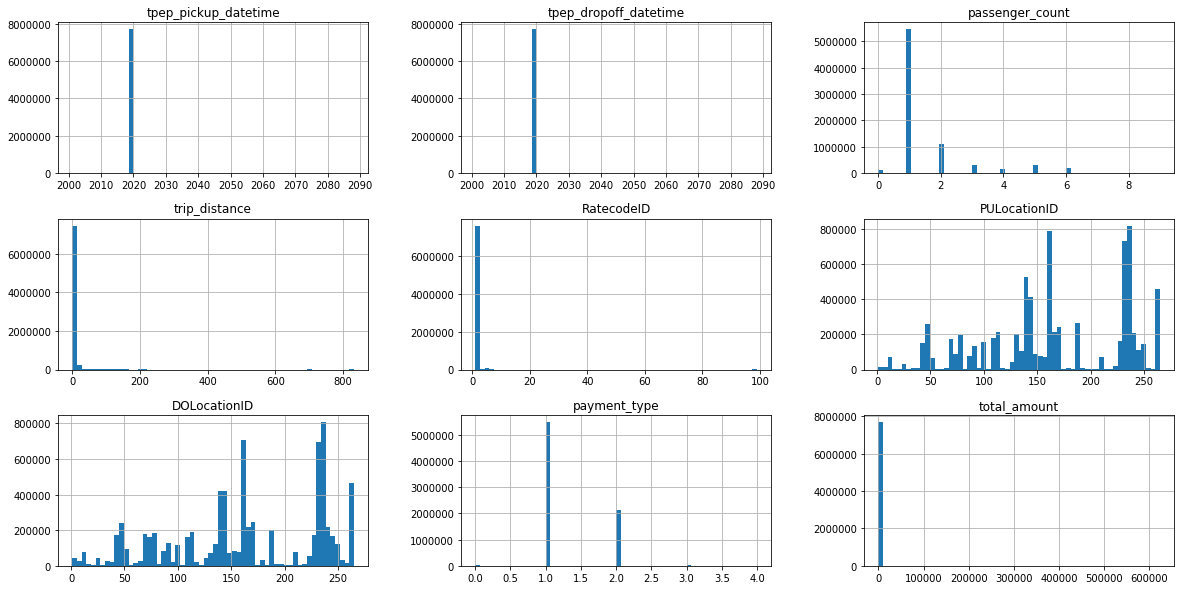

In [10]:
taxi_data.hist(figsize = (20,10), bins= 60)

In [11]:
taxi_data["RatecodeID"].value_counts()

1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: RatecodeID, dtype: int64

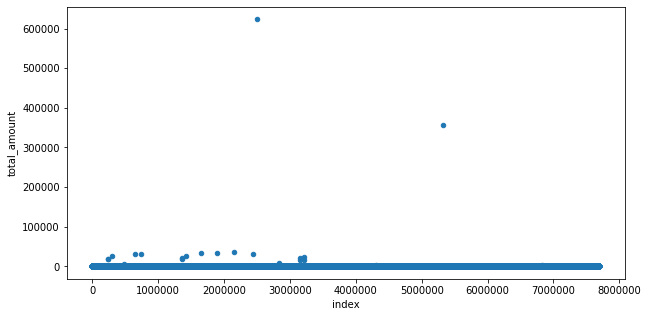

In [12]:
taxi_data.reset_index().plot(kind = "scatter", y="total_amount", x="index", figsize=(10,5))

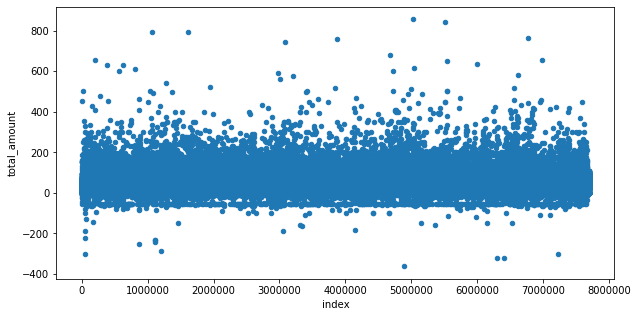

In [18]:
taxi_data[taxi_data["total_amount"]<1000].reset_index().plot(kind = "scatter", y="total_amount", x="index", figsize=(10,5))

(7127, 9)


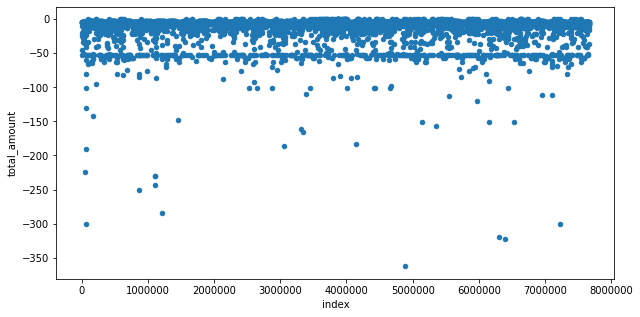

In [13]:
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind="scatter", y="total_amount", x="index", figsize = (10,5))

In [14]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [15]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

3    4083
4    2667
2     376
1       1
Name: payment_type, dtype: int64

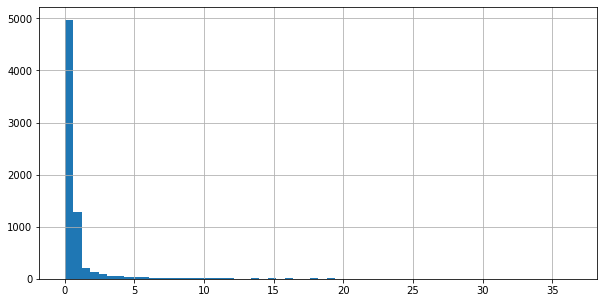

In [16]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [20]:
print(taxi_data[taxi_data['total_amount'] == 0].shape)
taxi_data[taxi_data['total_amount'] == 0].head()


(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [21]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

1    813
2    569
0    231
3     29
4      1
Name: payment_type, dtype: int64

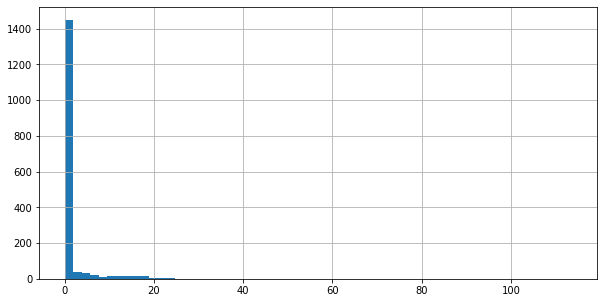

In [23]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [24]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: trip_distance, Length: 256, dtype: int64

I can get rid of the negative values. Now I will decide about the very high values.

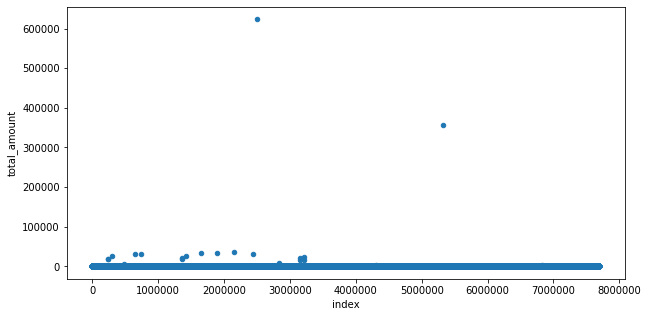

In [25]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [31]:
taxi_data[taxi_data['total_amount']>200].shape

(1166, 9)

In [40]:
taxi_data['total_amount'].mean()

15.81065134371489

In [41]:
taxi_data.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          28672
trip_distance                0
RatecodeID               28672
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

##  3. Data cleaning

In [36]:
# Drop rows with null values in specific columns
taxi_data_cleaned = taxi_data.dropna(subset=['passenger_count', 'RatecodeID'])

# Filter rows where total_amount is greater than 0 and less than 200
taxi_data_filtered = taxi_data_cleaned[(taxi_data_cleaned['total_amount'] > 0) & (taxi_data_cleaned['total_amount'] < 200)]

In [37]:
print(taxi_data.shape)
taxi_data_filtered.shape

(7696617, 9)


(7658235, 9)

checking missing values

In [38]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

## 4.Data preparation 

In [44]:
taxi_data_prepared = taxi_data_filtered.copy()

Making sure everything is in the right type

In [48]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [51]:
taxi_data_prepared.loc[:,'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'payment_type'] = taxi_data_prepared['payment_type'].astype(str)

In [53]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

Transforming variables into the formats that we need them

In [54]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


In [55]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)
# -> we make it datetime again because it's very little use when it's just a string (can't compare, sort, etc.)
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] =  taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [57]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022385385E08>,
      dtype=object)

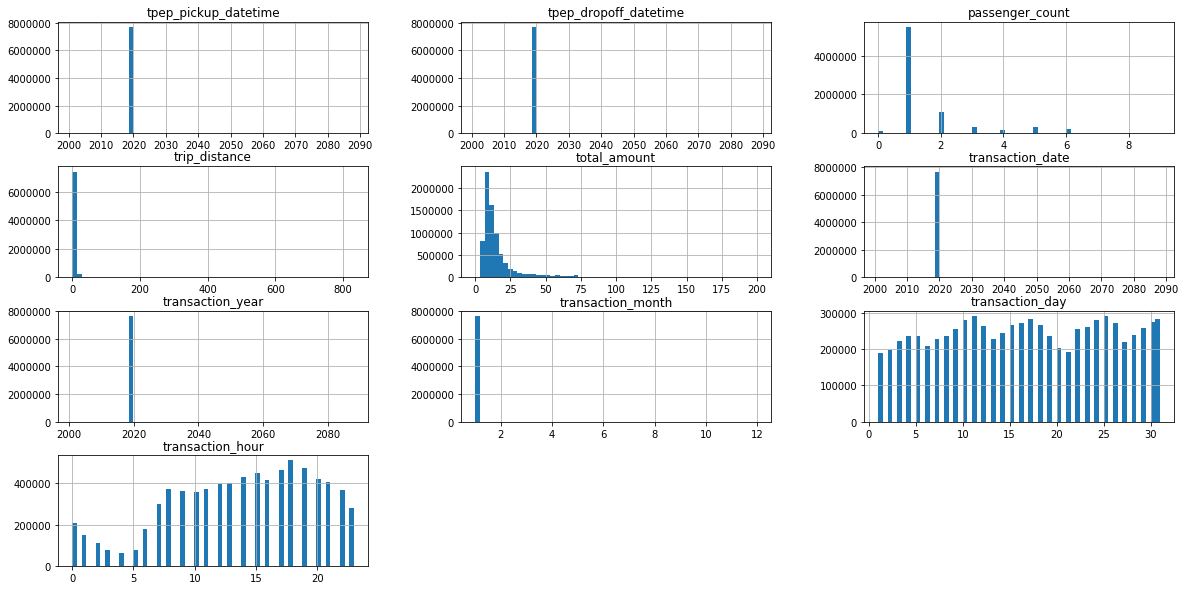

In [58]:
taxi_data_prepared.hist(figsize=(20,10), bins = 60)

In [59]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

Nothing down categorical and numerical columns

In [60]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [61]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7657703, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


Aggragate data points
Now is a good time to think about what we want to predicl. Depending on this, we need to transform out data to have a certain format.

In [63]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head(10)

(102461, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.000,21.8000,1
1,1,2019-01-01,1,1,5,0.000,87.3000,1
2,1,2019-01-01,1,1,6,0.000,80.3000,1
3,1,2019-01-01,1,1,8,0.000,128.5800,2
4,1,2019-01-01,1,1,10,16.900,43.2450,4
5,1,2019-01-01,1,1,12,4.825,126.2525,4
6,1,2019-01-01,1,1,13,0.000,85.3000,1
7,1,2019-01-01,1,1,15,20.640,79.3100,2
8,1,2019-01-01,1,1,17,0.000,105.5000,1
9,1,2019-01-01,1,1,19,0.055,115.3300,2


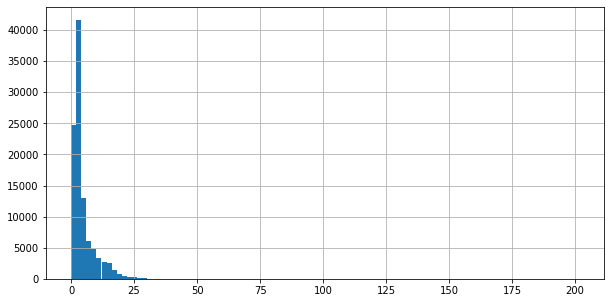

In [64]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize = (10,5))

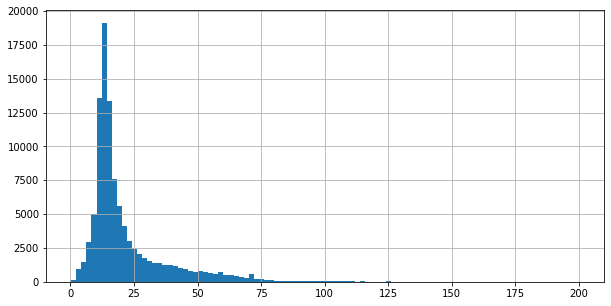

In [65]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize = (10,5))

## 5.Benchmark model

In [66]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [132]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark  = 'total_amount'

### 5.1 Train-test split 

In [133]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

### 5.2 Fit a model to the data 

In [134]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### 5.3 Model evaluation 

In [135]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))


mean_absolute_error 3.411331671012248
mean_squared_error 67.42243286772195
root_mean_squared_error 8.211116420300101
r2 0.7623330792633584


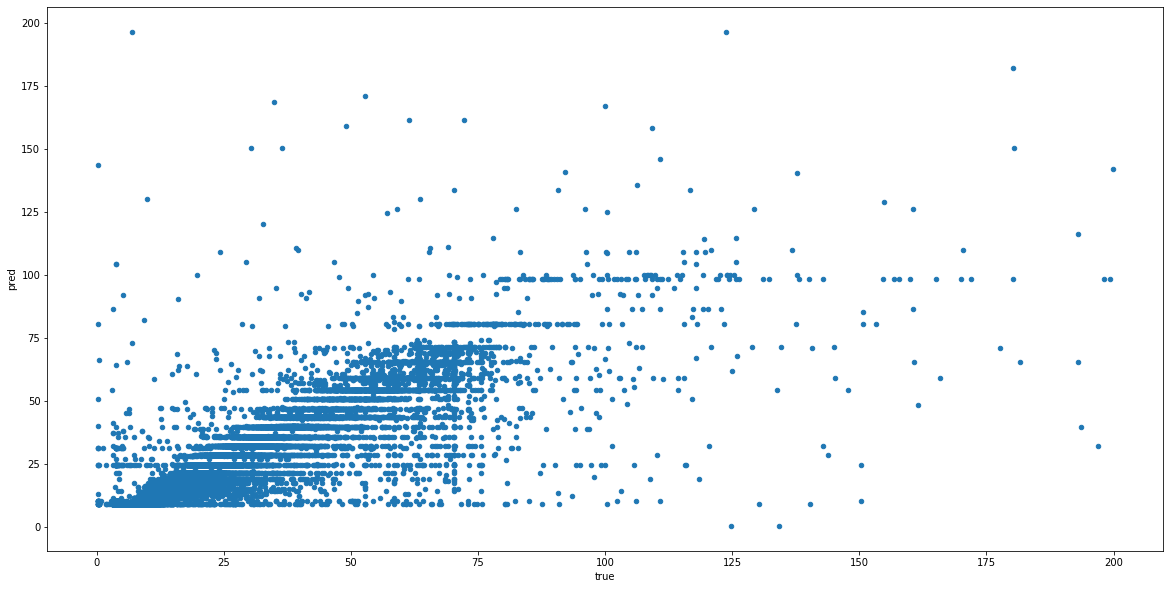

In [136]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

#### Note: There is a data leakage. The reason of this data leakage I added trip_distance in input. The 'trip distance' column includes information that wouldn't be available at the time of prediction in a real-world scenario, using it as an input feature would constitute data leakage.

### 5.4 Fixing the problems 

In [137]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark  # I deleted trip distance
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 9.852997236600268
mean_squared_error 226.56804361624995
root_mean_squared_error 15.052177371272569
r2 0.20133808625321048


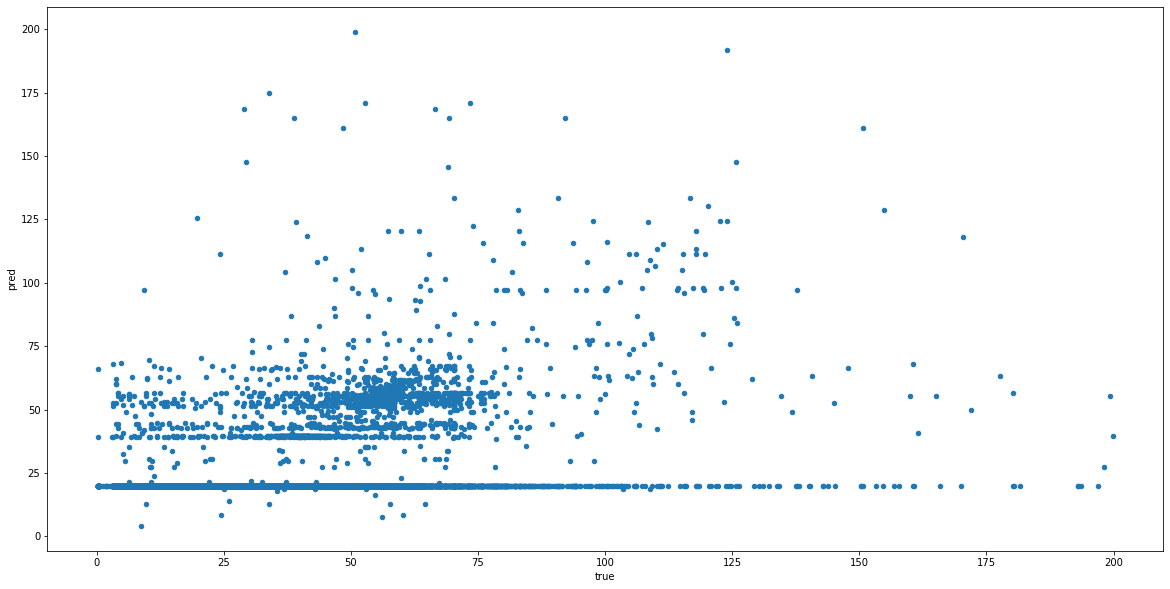

In [138]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## 6.Feature Engineering

In [77]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [78]:
data_with_new_features = taxi_grouped_by_region.copy()

#### Date-related features 

In [79]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [80]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [81]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


#### Borough information 

In [82]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [83]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [84]:
data_with_new_features['Borough'].value_counts()


Manhattan        45309
Brooklyn         23632
Queens           21911
Bronx             9584
Unknown            744
Staten Island      302
EWR                270
Name: Borough, dtype: int64

Note: Manhattan, Brooklyn, and Queens have much more data. Therefore, if we use just these three boroughs, our model will likely perform much better.

#### Weather related features 

In [86]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [88]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [89]:
nyc_weather['cloud cover'].value_counts()

70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: cloud cover, dtype: int64

In [92]:
nyc_weather['amount of precipitation'].value_counts()

Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0                        1
Name: amou

In [93]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

Trace of precipititation can thought of as 0.1
And the missing values 0

In [95]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)
# option 1
# nyc_weather['amount of precipitation'].fillna(0, inplace=True)
# option 2
#nyc_weather['amount of precipitation'].fillna(method='ffill', inplace=True)
# option 3
nyc_weather['amount of precipitation'].interpolate(inplace=True)

In [96]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

In [97]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [98]:
nyc_weather.loc[:,'date and time'] = pd.to_datetime(nyc_weather.loc[:,'date and time'])
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

In [99]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [100]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [101]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ['transaction_month','transaction_day','transaction_hour'], right_on = ['month','day','hour'], how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102461, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [102]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time','hour','month','day'], axis=1)

In [103]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,15.6,62.0,11.0,0.7,0.473333


In [104]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                      709
temperature                68310
humidity                   68310
wind speed                 68310
cloud cover                68310
amount of precipitation    68310
dtype: int64

In [105]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(['transaction_date','transaction_hour']).reset_index().drop('index',axis=1)

In [109]:
nyc_taxi_with_weather_numeric = nyc_taxi_with_weather.select_dtypes(include=[np.number])
nyc_taxi_with_weather[nyc_taxi_with_weather_numeric.columns] = nyc_taxi_with_weather_numeric.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

## 7. Model Training 

In [110]:
data_for_model = nyc_taxi_with_weather.copy()

In [111]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'total_amount'

In [115]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 7.1 Decision tree 

In [116]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [117]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.419123937362402
mean_squared_error 191.02208342309322
root_mean_squared_error 13.821073888200338
r2 0.30340725026606863


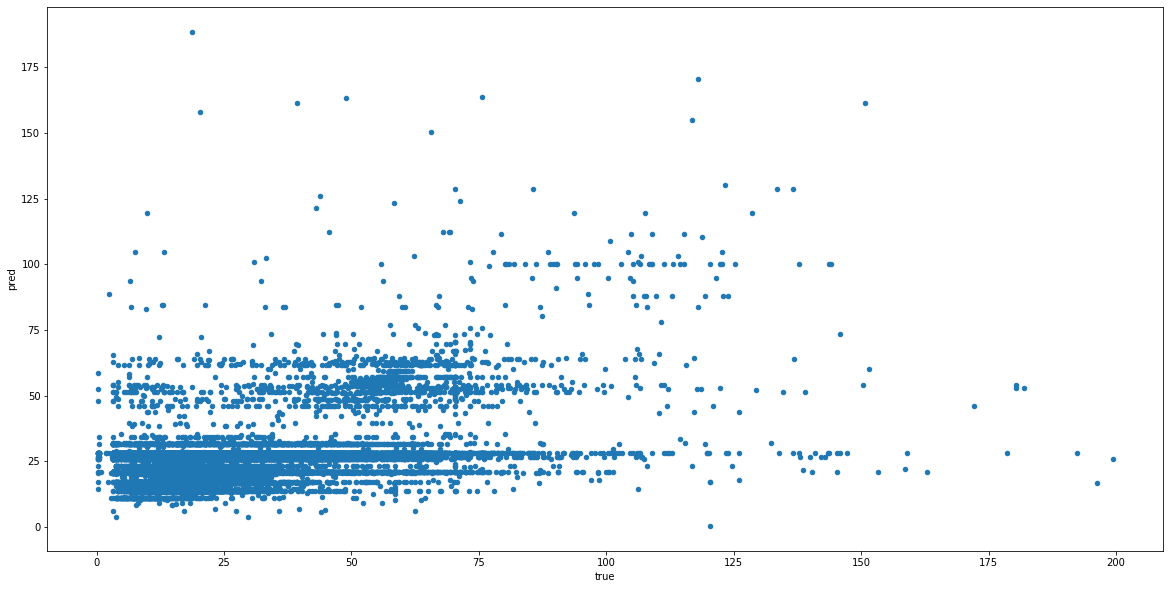

In [118]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## Overfit

In [119]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [120]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [121]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,15.069497,14.927991
1,5,14.224765,14.199709
2,8,13.559934,13.848044
3,10,13.081839,13.788355
4,15,11.852406,14.037983
5,20,10.733395,14.419290
6,30,8.861777,15.246035
7,50,4.928171,16.682274
8,70,1.483607,17.162970
9,100,0.000006,17.222197


Text(0, 0.5, 'root mean squared error')

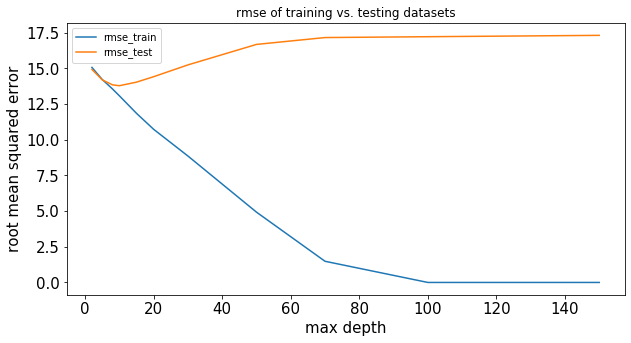

In [122]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

From the upper graph and table, we can determine that the optimal max_depth for our model is 10.

### 7.2 Random Forest 

In [124]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [125]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 7.407462831029205
mean_squared_error 169.75807682354716
root_mean_squared_error 13.029124177148176
r2 0.38094987027158134


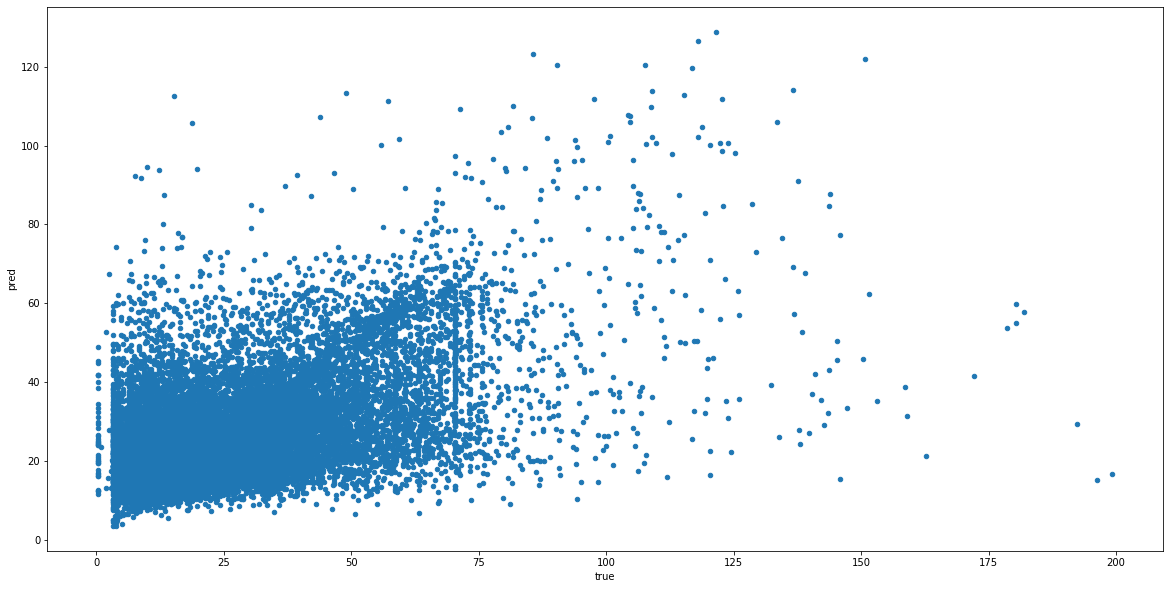

In [126]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

### 7.3 Gradient boosting 

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [139]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 8.329408656818236
mean_squared_error 174.00325720610044
root_mean_squared_error 13.19102942177374
r2 0.36546913724424046


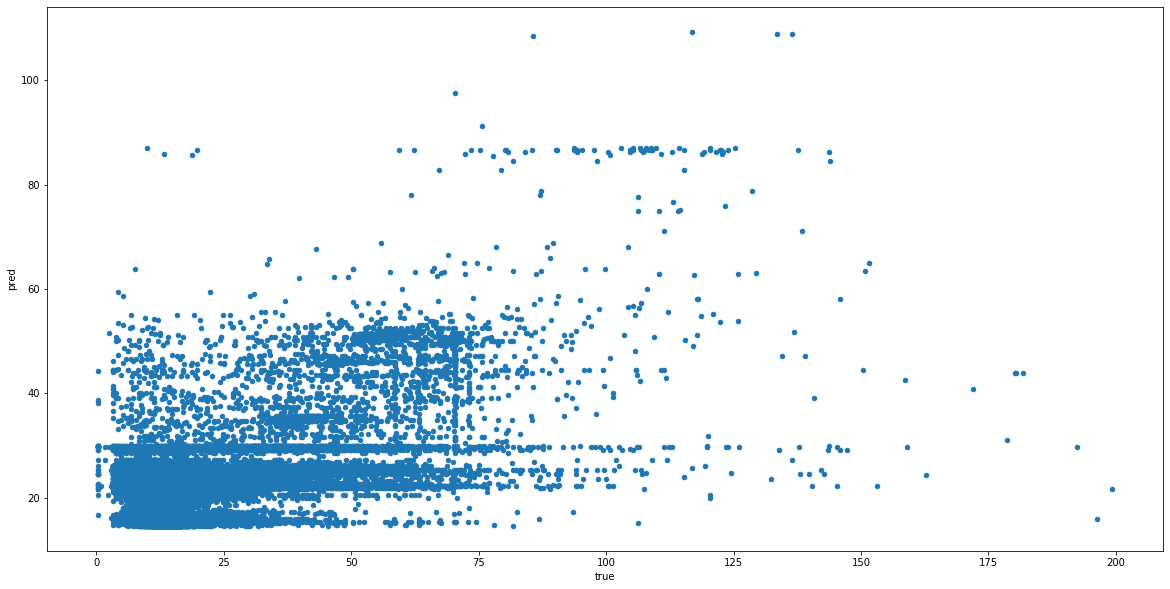

In [140]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

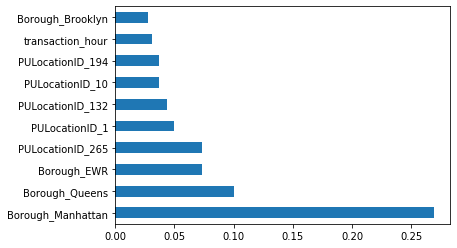

In [141]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

### 7.4 Comparing algorithm performances 

In [145]:
from tabulate import tabulate

data = {
    'Algorithm': ['Benchmark model', 'Decision tree', 'Random forest', 'Gradient boosting'],
    'MAE': [9.852, 8.419, 7.407, 8.329],
    'RMSE': [15.052, 13.821, 13.029, 13.191],
    'R2': [0.201, 0.303, 0.380, 0.365]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the table
df

,Algorithm,MAE,RMSE,R2
0,Benchmark model,9.852,15.052,0.201
1,Decision tree,8.419,13.821,0.303
2,Random forest,7.407,13.029,0.380
3,Gradient boosting,8.329,13.191,0.365


## 8. Tuning 

#### Random forest algorithm is tuned because it shows the best performance

### 8.1 Find the best parameters 

In [146]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [151]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [148]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 106.9min finished


In [149]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,130.200452,0.299574,5.122257,0.078933,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.405690,0.420178,0.405140,0.410336,0.006963,2
1,42.845902,0.519816,1.973450,0.046320,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.359894,0.365895,0.352461,0.359416,0.005495,8
2,53.975578,1.784007,1.831461,0.060074,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.358344,0.372816,0.354804,0.361988,0.007792,7
3,872.757219,34.387194,3.818466,0.146216,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",0.360195,0.369008,0.362302,0.363835,0.003758,6
4,3207.183929,82.343369,10.834916,0.744793,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",0.359705,0.376630,0.356207,0.364181,0.008918,5
5,824.782190,38.024063,37.859460,1.455178,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.383524,0.400175,0.383735,0.389144,0.007800,4
6,124.246312,1.203485,4.039210,0.054994,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.274420,0.278290,0.268762,0.273824,0.003912,9
7,471.348225,13.990157,21.366542,0.846944,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.409910,0.418226,0.401591,0.409909,0.006791,3
8,4825.025688,155.224030,23.064049,2.863489,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",0.155524,0.206839,0.190984,0.184449,0.021453,10
9,417.132636,8.080945,15.771401,0.677288,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.417495,0.427681,0.413084,0.419420,0.006113,1


In [150]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=1800,min_samples_split= 2,
min_samples_leaf= 4,
max_features= 'sqrt',
max_depth= 300,
bootstrap= True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  437.2168884277344  seconds
mean_absolute_error 7.360197340409891
mean_squared_error 156.97836187845556
root_mean_squared_error 12.529100601338293
r2 0.4275531562105145


In [153]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 150,
bootstrap= True)
second_best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  55.10381484031677  seconds
mean_absolute_error 7.299895217615742
mean_squared_error 156.3080873532724
root_mean_squared_error 12.502323278226028
r2 0.4299974200684257


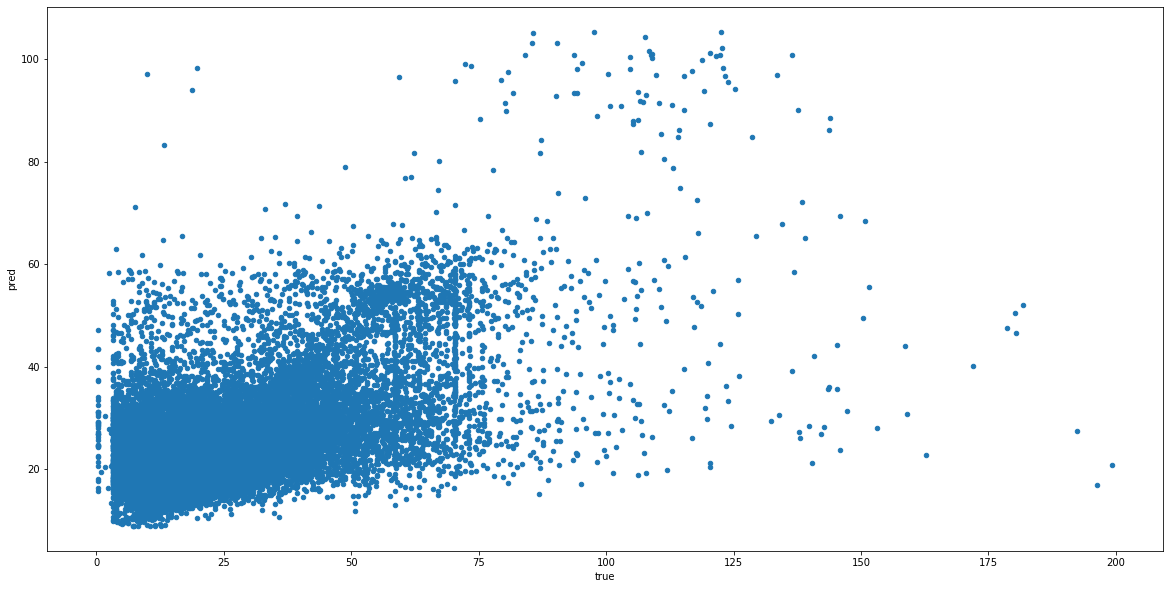

In [154]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')